In [1]:
from interpretable_ssl.trainers.scpoli_trainer import *


INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)
 captum (see https://github.com/pytorch/captum).


In [7]:
st = ScpoliTrainer()


loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:

# check weather marker genes exist in the expression profile gene list

# write a function that get a cell and output expression value of merer genes

# visualize

# get protoype cells

# find expression value of marker genes in one prototype cell

# find it for all cells + visualize


In [9]:
cell_marker_genes = {
    'CD4+ T cells': ['CD4', 'IL2RA', 'CCR5', 'TBX21'],
    'CD8+ T cells': ['CD8A', 'CD8B', 'GZMA', 'GZMB'],
    'CD10+ B cells': ['CD10', 'CD19', 'CD20', 'MS4A1'],
    'CD14+ Monocytes': ['CD14', 'CD68', 'CD163'],
    'CD16+ Monocytes': ['CD16', 'FCGR3A', 'LYZ', 'S100A9'],
    'CD20+ B cells': ['CD19', 'CD20', 'MS4A1', 'CD79A'],
    'Erythrocytes': ['HBB', 'ALAS2', 'EPB42', 'SLC4A1'],
    'Erythroid progenitors': ['GATA1', 'KLF1', 'EPOR', 'ALAS2'],
    'HSPCs': ['CD34', 'CD133', 'CD90', 'CD45'],
    'Megakaryocyte progenitors': ['CD41', 'CD61', 'MPL', 'ITGA2B'],
    'Monocyte progenitors': ['CD34', 'CD45RA', 'CD117', 'CD38'],
    'Monocyte-derived dendritic cells': ['CD1c', 'CD11c', 'CD86', 'CD209'],
    'NK cells': ['CD56', 'CD16', 'CD94', 'NKG2D'],
    'NKT cells': ['CD3', 'CD56', 'CD161', 'TCR Vα24-Jα18'],
    'Plasma cells': ['CD138', 'CD38', 'CD19', 'IRF4'],
    'Plasmacytoid dendritic cells': ['CD303', 'CD304', 'CD123', 'TLR7']
}

In [54]:
adata = st.dataset.adata
genes = set(adata.var.index)
marker_genes = [cell_marker_genes[cell] for cell in cell_marker_genes]
marker_genes = [marker_genes[i][j] for i in range(len(marker_genes)) for j in range(len(marker_genes[i]))]
adata_marker_genes = genes.intersection(marker_genes)

In [90]:
def get_marker_genes_idx(adata_marker_genes, adata):
    marker_gene_idx = [list(adata.var.index).index(gene) for gene in adata_marker_genes]
    return marker_gene_idx

def get_marker_genes_expression(cells, marker_gene_idx, marker_gene_names, index):
    expressions = cells[:, marker_gene_idx]
    df = pd.DataFrame(expressions, index=index)
    df.columns = marker_gene_names
    return df


marker_gene_idx = get_marker_genes_idx(adata_marker_genes, adata)
cells_idx = [1,2,3]
cells = adata.X[cells_idx].toarray()
cells

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , ..., 1.74, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , ..., 1.59, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.  , ..., 1.74, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [91]:
cell_types = adata.obs.cell_type[cells_idx].values
get_marker_genes_expression(cells, marker_gene_idx, adata_marker_genes, cell_types)

,CD38,CD163,ITGA2B,LYZ,GZMB,FCGR3A,IRF4,TLR7,S100A9,CCR5,CD14
CD4+ T cells,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
CD14+ Monocytes,0.0,0.830068,0.0,5.168318,0.0,0.0,0.0,0.0,5.190173,0.0,2.170293
CD14+ Monocytes,0.0,0.000000,0.0,5.347047,0.0,0.0,0.0,0.0,5.880951,0.0,2.174528


# get prototype cells

In [93]:
st.latent_dims = 5
model = st.load_model()

/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/scarches/models/scpoli/scpoli_model.py:143: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['conditions_combined'] = adata.obs[condition_keys]


Embedding dictionary:
 	Num conditions: [3]
 	Embedding dim: [10]
Encoder Architecture:
	Input Layer in, out and cond: 4000 64 10
	Mean/Var Layer in/out: 64 5
Decoder Architecture:
	First Layer in, out and cond:  5 64 10
	Output Layer in/out:  64 4000 



In [94]:
prototypes = model.prototype_head.prototype_vectors

Parameter containing:
tensor([[ 0.128,  0.480,  0.004,  0.064,  0.121],
        [ 0.473,  0.202,  0.108, -0.025,  0.088],
        [-0.075, -0.147, -0.103,  0.157,  0.174],
        [ 0.156,  0.419,  0.095,  0.124,  0.098],
        [ 0.138,  0.480,  0.107,  0.065,  0.121],
        [-0.003, -0.433,  0.027,  0.134, -0.064],
        [ 0.207,  0.381, -0.006,  0.142,  0.038],
        [ 0.462,  0.027,  0.078,  0.170,  0.295],
        [-0.238, -0.059,  0.357,  0.022, -0.023],
        [ 0.338,  0.367,  0.147,  0.123, -0.041],
        [ 0.166,  0.445,  0.061,  0.072,  0.093],
        [-0.071, -0.518, -0.019,  0.203,  0.114],
        [ 0.126,  0.418,  0.050,  0.058,  0.138],
        [-0.149,  0.235, -0.023, -0.256, -0.343],
        [ 0.194,  0.471,  0.061, -0.111,  0.150],
        [ 0.139,  0.435,  0.041,  0.107,  0.119]], requires_grad=True)

# calculate mean batch embedding of all refrence (but i am not sure it would be the best option) - check if there are better ones

In [96]:
train_adata, train_loader, val_adata, val_loader = (
    st.prepare_scpoli_data_splits(st.ref, model.scpoli.model)
)

In [134]:
self = model.scpoli_model

def calc_batch_embedding(inp):
    batch = inp['batch']
    batch_embeddings = torch.hstack([self.embeddings[i](batch[:, i]) for i in range(batch.shape[1])])
    return batch_embeddings

In [138]:
b_emb = calc_batch_embedding(next(iter(train_loader)))

In [140]:
b_emb.sum(axis=0).shape

torch.Size([10])

In [143]:
mean_batch_emb = None
cnt = 0
for inp in train_loader:
    if mean_batch_emb == None:
        mean_batch_emb = calc_batch_embedding(inp).sum(axis=0)
    else:
        mean_batch_emb += calc_batch_embedding(inp).sum(axis=0)
    cnt += len(inp)
        


In [145]:
mean_batch_emb /= cnt

In [152]:
prot_batch_emb = mean_batch_emb.repeat(len(prototypes), 1)

In [156]:
prot_cells, _ = self.decoder(prototypes, prot_batch_emb)

# get marker_gene expression for prot cells

In [161]:
df = get_marker_genes_expression(prot_cells.detach().numpy(), marker_gene_idx, adata_marker_genes, [f'prototype {i}' for i in range(len(prototypes))])

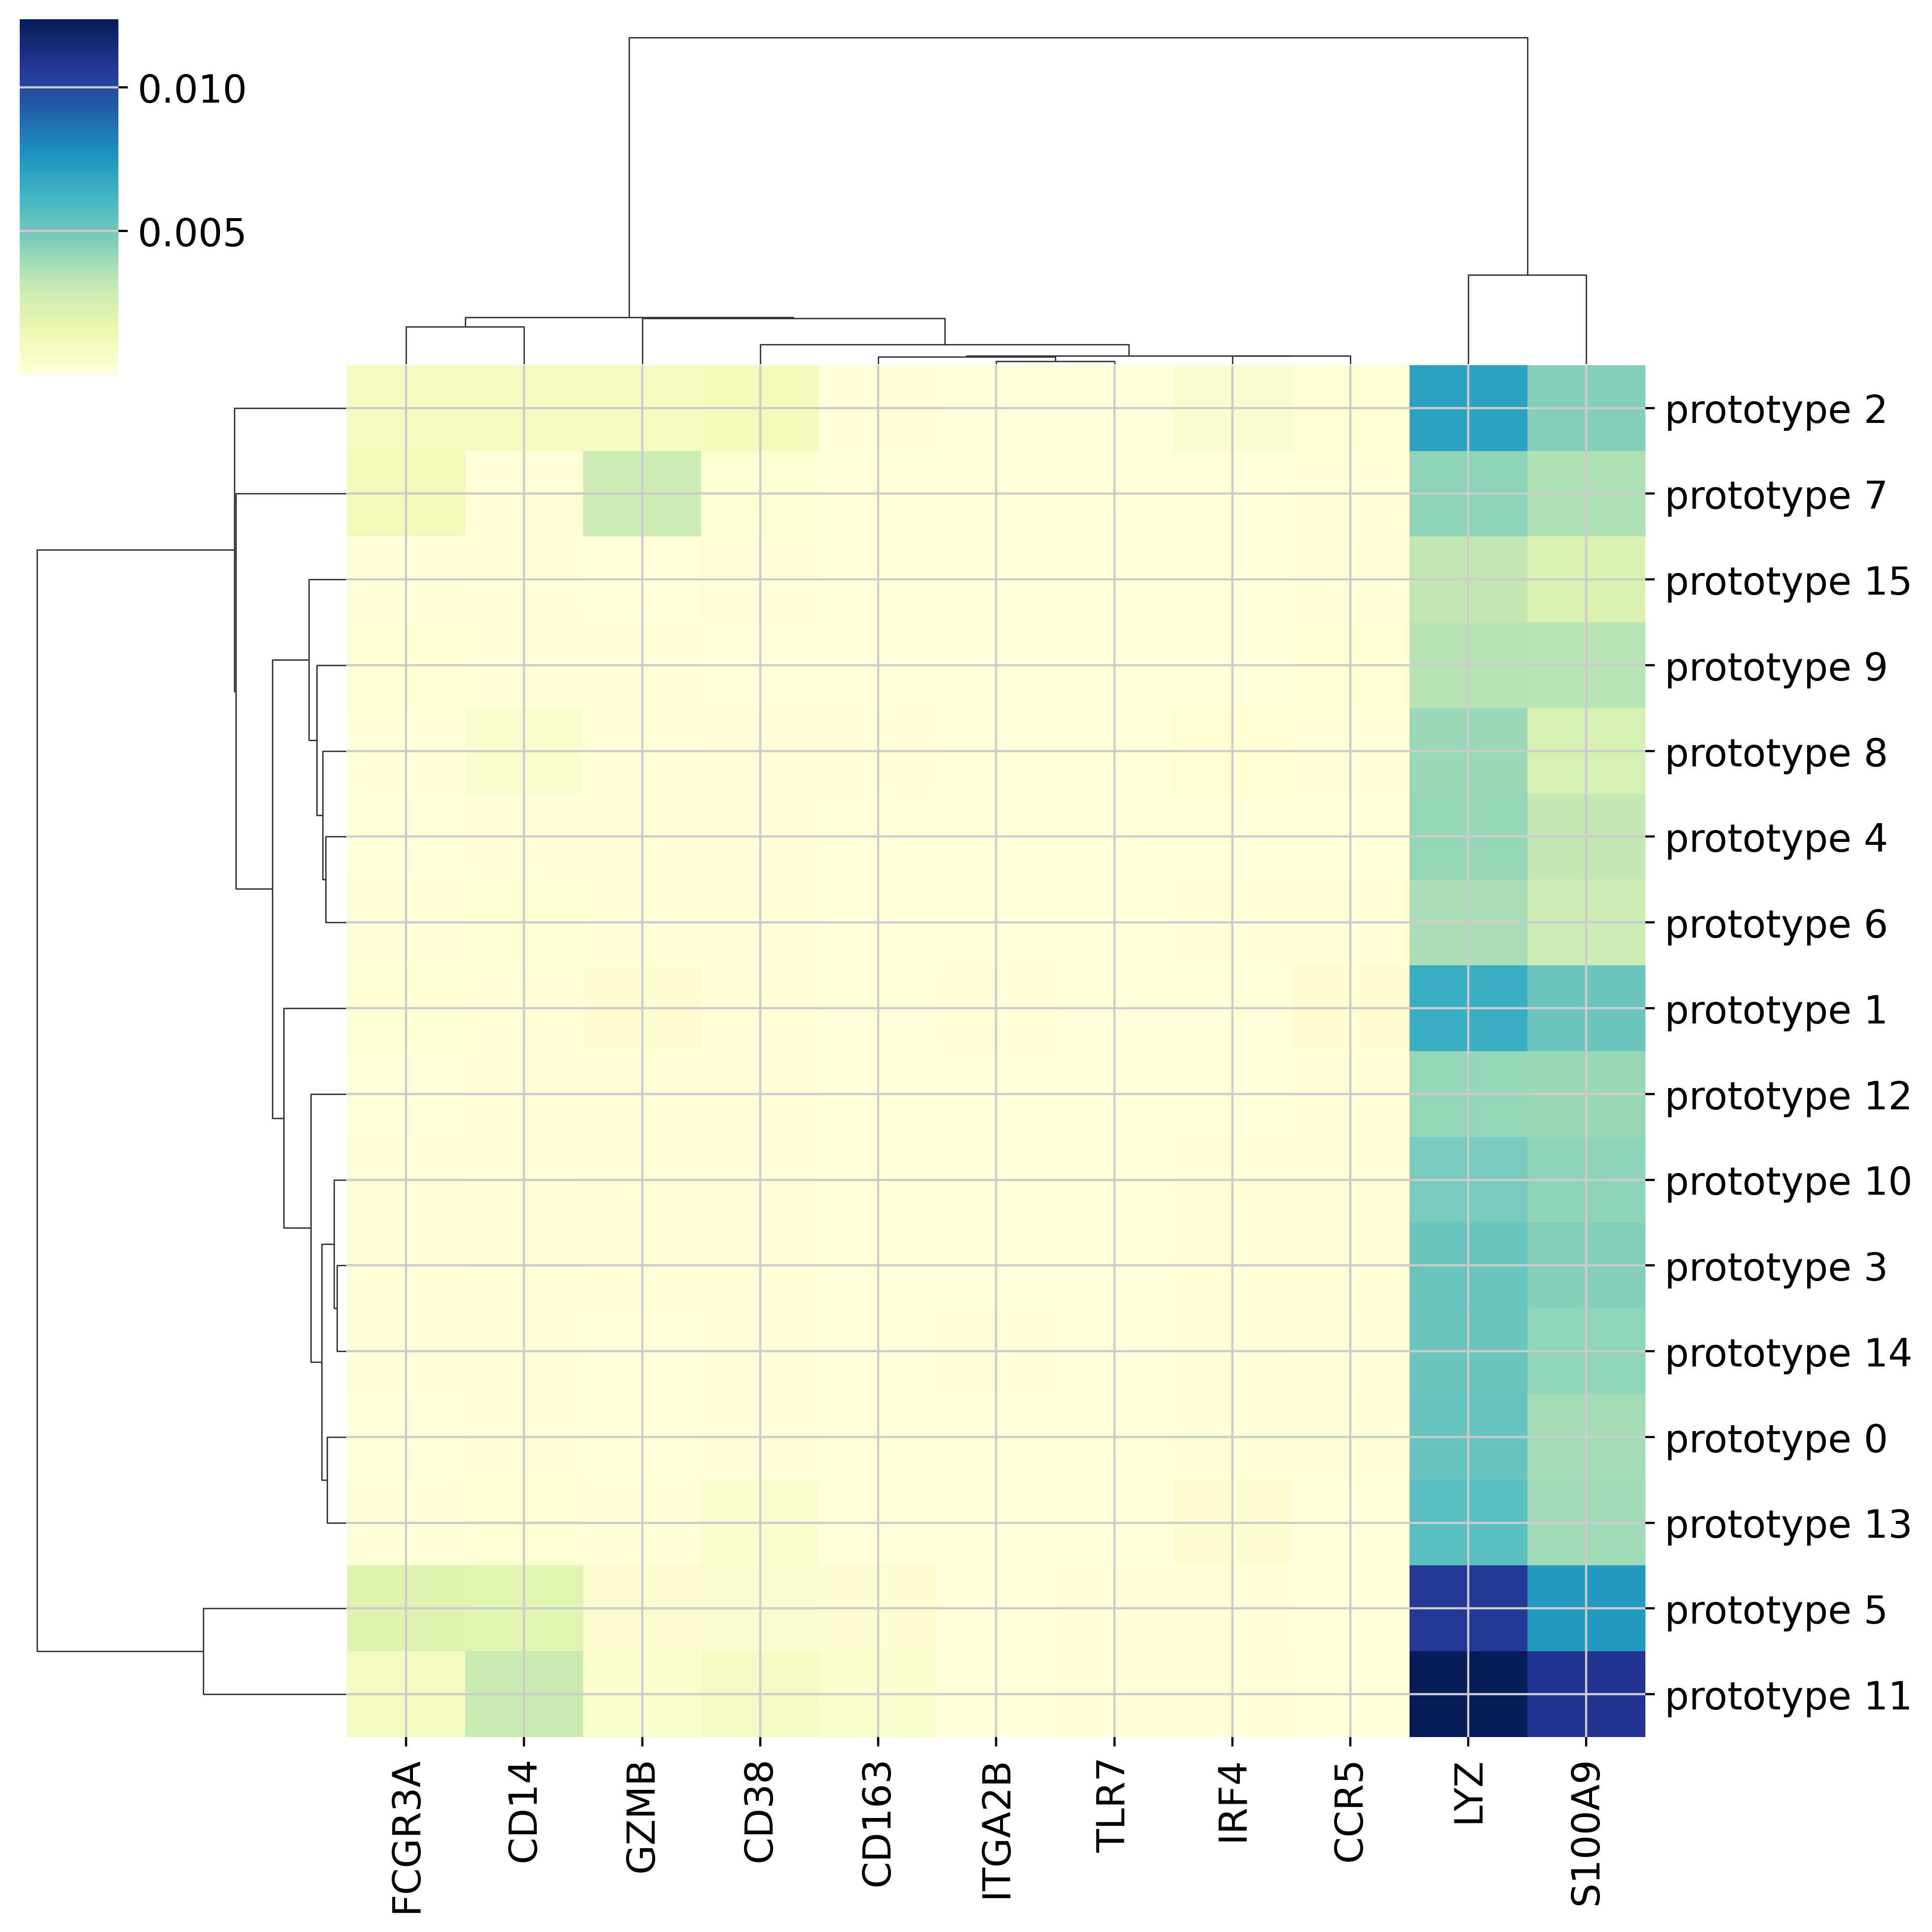

In [162]:
# Create the clustered heatmap using seaborn clustermap
sns.clustermap(df, cmap="YlGnBu")

# Display the heatmap
plt.show()

In [19]:
train_adata, train_loader, val_adata, val_loader = (
    st.prepare_scpoli_data_splits(st.ref, model.scpoli.model)
)


In [20]:
batch = next(iter(train_loader))

In [ ]:
batch_embeddings = torch.hstack([self.embeddings[i](batch[:, i]) for i in range(batch.shape[1])])
x_log = torch.log(1 + x)
if self.recon_loss == "mse":
    x_log = x
if "encoder" in self.inject_condition:
    z1_mean, z1_log_var = self.encoder(x_log, batch_embeddings)
else:
    z1_mean, z1_log_var = self.encoder(x_log, batch=None)
z1 = self.sampling(z1_mean, z1_log_var)

In [21]:
batch

{'x': tensor([[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 2.088, 0.000,
          0.881, 0.000, 0.000, 0.881, 0.881],
         [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 0.000, 0.000,
          0.000, 0.000, 0.000, 0.000, 0.000],
         [0.650, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 1.719, 0.000,
          0.000, 0.000, 0.000, 1.041, 0.000],
         [0.000, 0.000, 0.000, 1.658, 0.000, 0.000, 0.000,  ..., 2.090, 0.000,
          0.000, 0.000, 0.000, 0.882, 0.000],
         [0.657, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 1.332, 0.000,
          0.000, 0.000, 0.000, 0.000, 0.000],
         [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 0.000, 0.000,
          0.000, 0.000, 0.000, 0.000, 0.000],
         [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 0.872, 0.000,
          0.000, 0.000, 0.000, 0.000, 0.000],
         ...,
         [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,  ..., 0.000, 0.000,
          0.000, 0.000, 0.0

In [ ]:
protoypes_cells = model.scpoli.